# 1. Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

      > Nama : Reyki seprianza

      > Batch :009
## Dataset Description

> Dataset yang di gunakan adalah [weatherAUS](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

### Tentang Data

> Dataset ini berisi 10 tahun observasi harian cuaca dari Australian weather stations

> RainTomorrow adalah target yang akan di prediksi

> Untuk menhitung curah hujan itu tersendiri dapat dilihat pada data refrensi ini [Paper_refrensi](http://www.ucarecdn.com/291437ad-340b-4e16-8161-f3493f66357e/)


- Date = The date of observation

- Location = The common name of the location of the weather station

- MinTemp = The minimum temperature in degrees celsius

- MaxTemp = The maximum temperature in degrees celsius

- Rainfall = The amount of rainfall recorded for the day in mm

- Evaporation = The so-called Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine = The number of hours of bright sunshine in the day.

- WindGustDir = The direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed = The speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am = Direction of the wind at 9am

---

### Insight !
>Curah hujan (Rainfall) 
- Jumlah air yang jatuh di permukaan tanah dasar selama periode tertentu yang diukur dengan satuan tinggi milimeter di atas permukaan horizontal.

>Penguapan (Evaporation)
- Proses perubahan molekul di dalam keadaan cair dengan spontan menjadi gas. Proses ini adalah kebalikan dari kondensasi. Umumnya penguapan dapat dilihat dari lenyapnya cairan secara berangsur-angsur ketika terpapar pada gas dengan volume signifikan.

>Sinar matahari (Sunshine)
- Sinar yang berasal dari Matahari. Tanaman menggunakan cahaya matahari untuk berfotosintesis dan membuat makanan. Tanpa cahaya matahari, takkan ada kehidupan di bumi. Sinar matahari bisa berakibat baik maupun buruk kepada kesehatan seseorang.

>Hembusan angin (Wind gust)
- Peningkatan singkat dalam kecepatan angin, biasanya kurang dari 20 detik. Ini adalah karakter yang lebih sementara daripada squall, yang berlangsung beberapa menit, dan diikuti oleh jeda atau mengendur dalam kecepatan angin.


---


## Assignment Objectives

>Graded Challenge 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

### Model Insight !

>Classification
- kita ingin membagi dataset ke dalam beberapa kelompok. Namun yang membuatnya berbeda adalah, dalam klasifikasi kita memberi tahu kepada mesin (algoritma) kita pembagian kelompoknya, atau dengan kata lain kita mengajari mesin cara membagi kelompoknya. Sedangkan pada clustering, kita tidak mengajarkan mesin, namun ia yang akan melakukan pengelompokan dengan sendirinya.
[Sumber](https://www.megabagus.id/classification/)

>Logistic Regression
- regresi logistik merupakan teknik regresi yang fungsinya untuk memisahkan dataset menjadi dua bagian (kelompok). Seperti kasus koin yang dilempar, hasilnya hanya ada dua yaitu depan atau belakang. Begitu pula dengan regresi logistik, maka hasilnya hanyalah ada dua, yaitu YES atau No, atau bisa juga 1 atau 0.
[Sumber](https://www.megabagus.id/machine-learning-logistic-regression/)

>Support Vector Machines
-  SVM merupakan sebuah teknik yang menggunakan 2 titik (2 vektor), yang selanjutnya 2 titik ini akan membentuk garis pembatas (atau sisi pembatas jika 3 dimensi atau lebih). Garis/sisi pembatas yang dibentuk dari dua buah vektor ini disebut dengan hyperplane.
[Sumber](https://www.megabagus.id/machine-learning-support-vector-machines/)

# 2. Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import  LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, roc_auc_score,confusion_matrix



# 3. Data Loading
 > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df0 = pd.read_csv('weatherAUS.csv')

In [3]:
df = df0.copy()

# 4. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


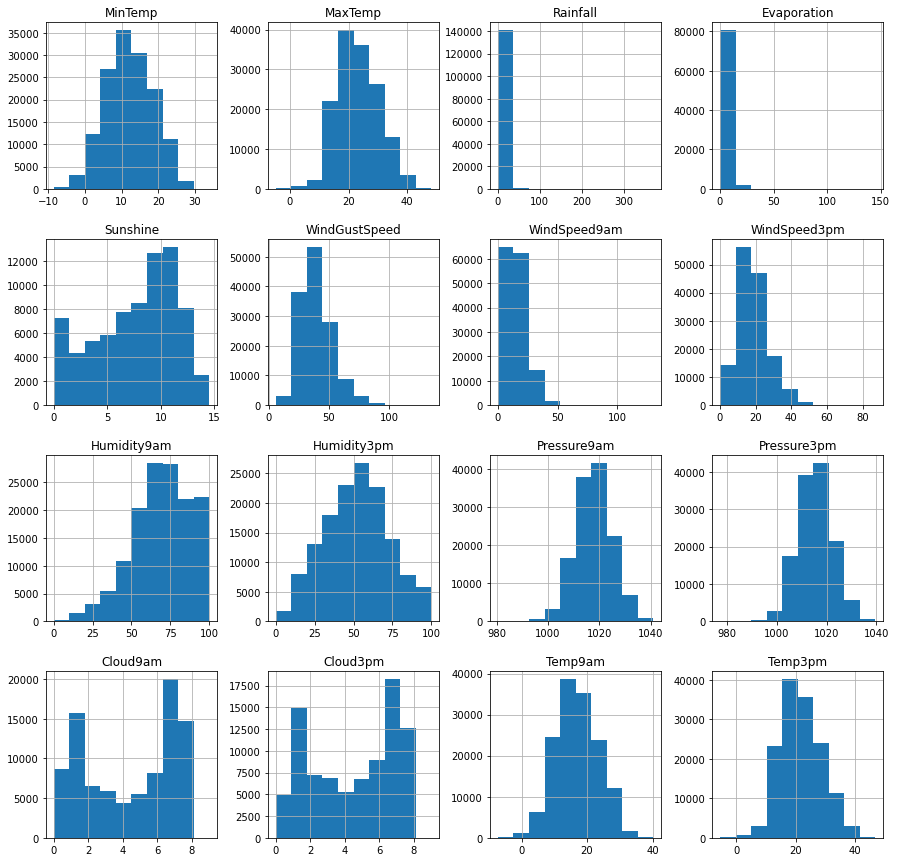

In [5]:
# Histogram plot

df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

In [6]:
df.shape

(145460, 23)

In [7]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
#memperbaiki value jika ada nan yg berbeda
df.replace('?', np.NaN)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


- Date, Location ,RainToday dan RainTomorow tidak muncul karena beratribut 'object'

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,145460,3436,2013-11-12,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,NaN,NaN,NaN,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,NaN,NaN,NaN,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,NaN,NaN,NaN,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,13.607062,6.0,31.0,39.0,48.0,135.0
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# melihat unique value
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [13]:
# mengecek missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot:>

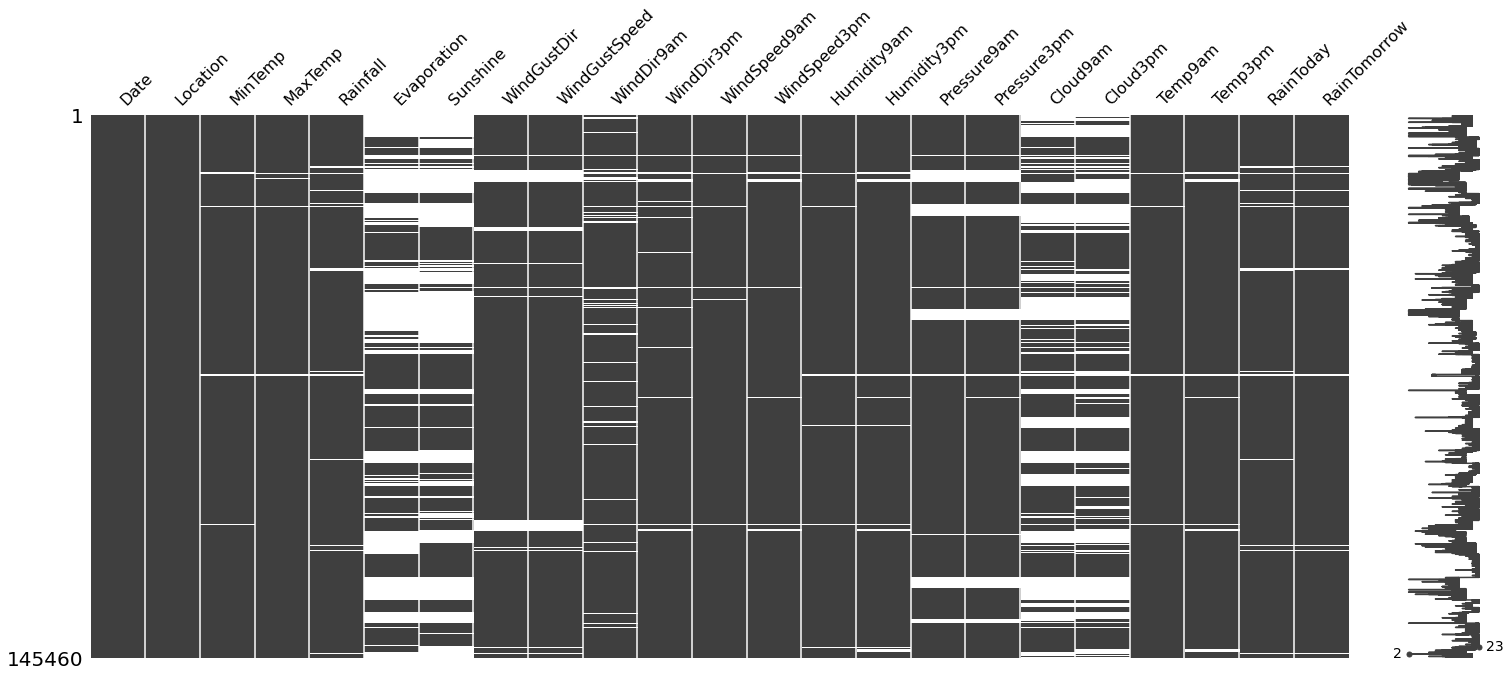

In [15]:
#Visualisasikan Missing value
msno.matrix(df)

> Terdapat banyak sekali missing value di dataset yang kita gunakan.

<AxesSubplot:>

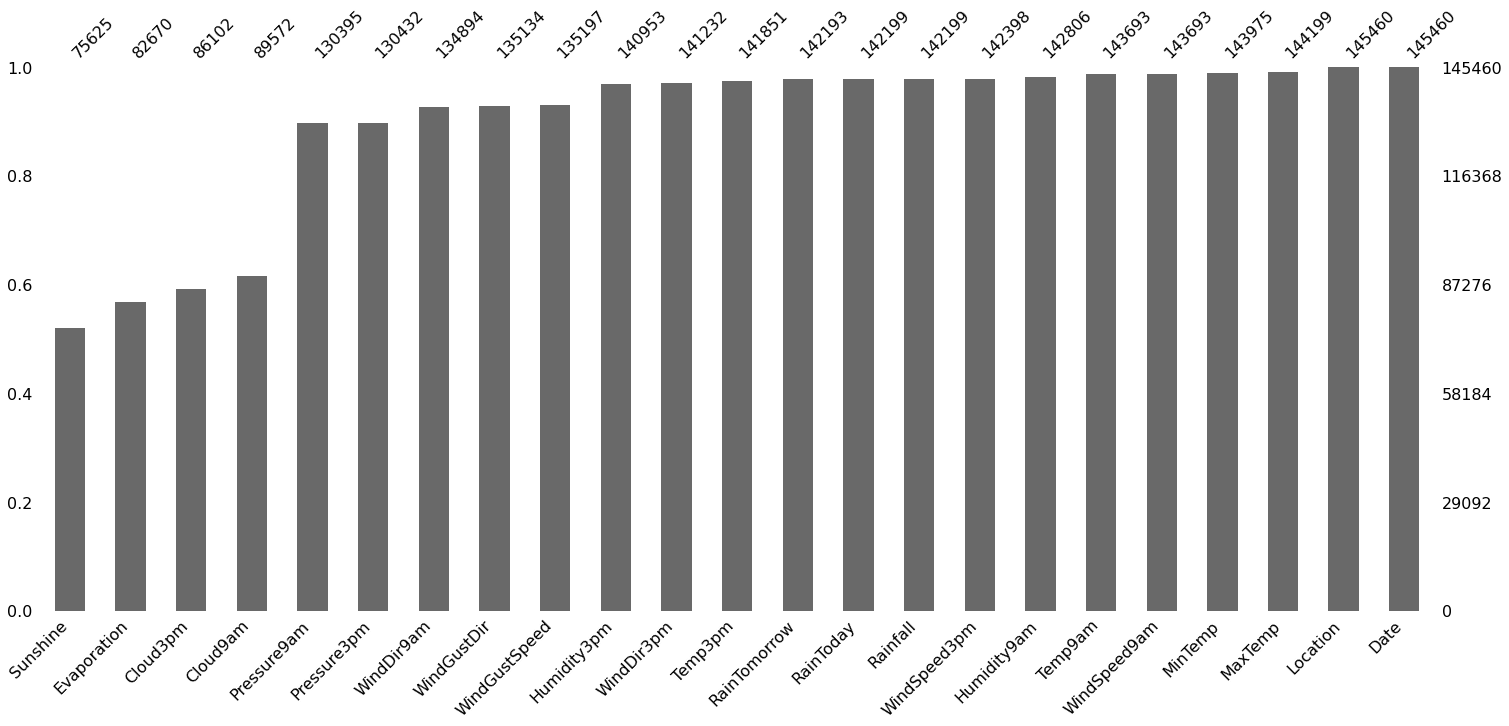

In [16]:
msno.bar(df, sort='ascending')

In [17]:
#Checking percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

<AxesSubplot:>

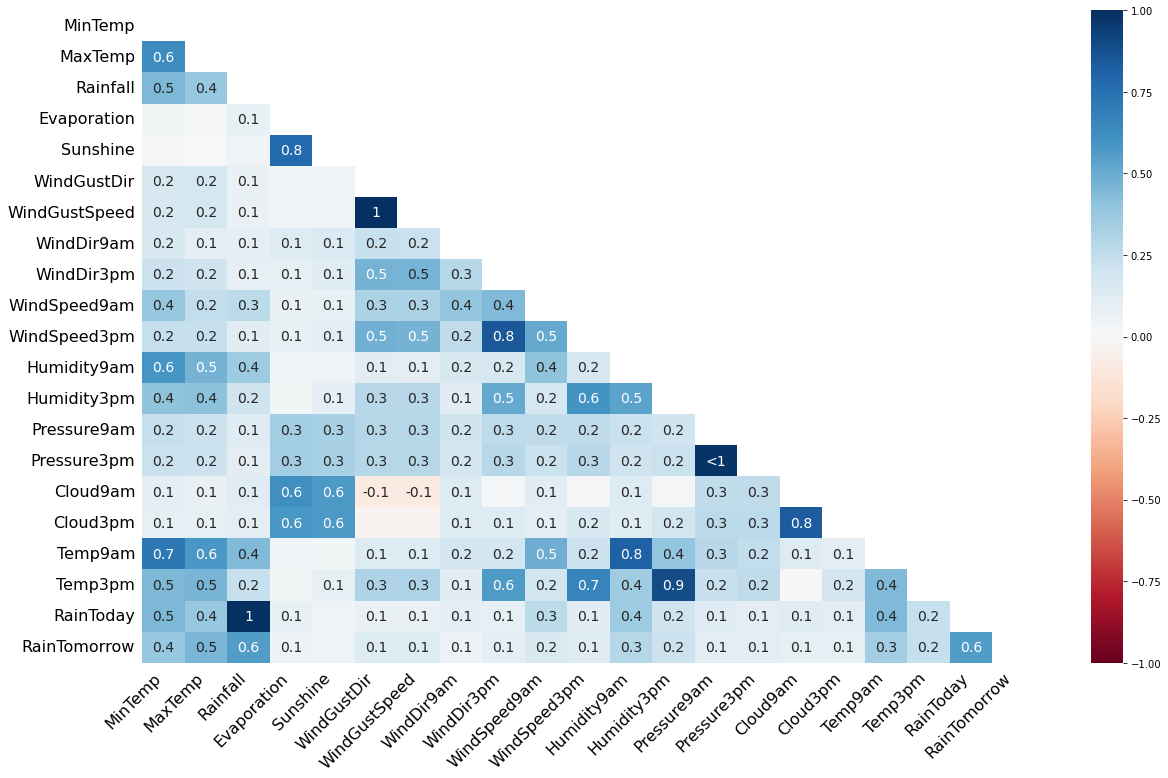

In [18]:
msno.heatmap(df)

# 5. Data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Feature Engineering

In [19]:
# find categorical variables

num_cols = [col for col in df.columns if df[col].dtypes != 'O']
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
# melihat cardinality dari feature, semakin tinggi cardinality menjadikan model kita semakin tidak baik

for var in cat_cols:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [21]:
df['Date'].dtypes

dtype('O')

---
## Feature Creation

In [22]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

# extract year from date
df['Year'] = df['Date'].dt.year

# extract month from date
df['Month'] = df['Date'].dt.month

# extract day from date
df['Day'] = df['Date'].dt.day

# drop the original Date variable
df.drop('Date', axis=1, inplace = True)

In [23]:
df[['WindGustDir','WindDir9am','WindDir3pm']].value_counts()


WindGustDir  WindDir9am  WindDir3pm
N            N           N             1424
W            W           W              774
S            S           S              769
SE           SE          SE             765
             SSE         SE             746
                                       ... 
ESE          SSW         NW               1
SSW          SE          NNW              1
NNE          SW          WNW              1
WNW          SSE         SSE              1
S            W           NNE              1
Length: 4019, dtype: int64

In [24]:
df[['WindGustDir','WindDir9am','WindDir3pm']].replace({'NNE':  'NE', 'ENE': 'NE',
                                                        'SSE': 'SE', 'ESE': 'SE',
                                                        'SSW': 'SW', 'WSW': 'SW',
                                                        'WNW': 'NW', 'NNW': 'NW'
                                                        }, inplace=True)
#mengurangi kardinalitas

In [25]:
df[['WindGustDir','WindDir9am','WindDir3pm']]

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW
...,...,...,...
145455,E,SE,ENE
145456,NNW,SE,N
145457,N,SE,WNW
145458,SE,SSE,N


> melakukan simpfilikasi arah mata angin

In [26]:
# Merubah value dari columns dfToday dan dfTomorrow ke 0,1 agar bisa di baca komputer
df['RainTomorrow'] =df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] =df['RainToday'].map({'Yes': 1, 'No': 0})

print(df.RainToday)
print(df.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


> merubah data di RainToday dan RainTomorrow menjadi binary
- 1 = Hujan
- 0 = Tidak Hujan

---
### Handling Missing Values

In [27]:
#Checking percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

In [28]:
# saving missing values in a variable
a = df.isnull().sum()/len(df)*100

# saving column names in a variable
variables = df.columns

In [29]:
# new variable to store variables having missing values less than a threshold

variable = [ ]

for i in range(df.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

In [30]:
variable

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [31]:
# membuat dataframe baru yang hanya mengandung variable yang memiliki missing value kurang dari 40%
df_new = df[variable]
df_new.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,2008,12,5


---
## Split dataset menjadi train, inf, dan test

In [32]:
#mengambil data inference sebanyak 10 data
df_inf =  df_new.sample(10, random_state=15)
df_inf

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
123551,Perth,5.9,15.8,13.8,SSW,61.0,S,SW,13.0,15.0,...,1017.3,1017.5,7.0,11.6,14.3,1.0,0.0,2016,9,19
90618,GoldCoast,22.1,30.3,0.0,ENE,20.0,ENE,E,11.0,15.0,...,1017.1,1015.7,NaN,26.2,27.5,0.0,0.0,2009,12,14
95813,Townsville,26.8,33.6,3.4,SSW,43.0,NaN,ENE,0.0,19.0,...,1004.1,1000.6,7.0,29.4,30.8,1.0,1.0,2016,2,5
70342,Melbourne,9.6,20.0,0.2,N,43.0,N,WNW,19.0,9.0,...,1019.6,1018.4,1.0,14.2,15.1,0.0,1.0,2017,5,6
133845,Launceston,8.8,24.4,0.0,NW,30.0,ENE,NW,6.0,17.0,...,1023.9,1019.4,NaN,14.0,23.9,0.0,0.0,2011,2,23
28445,Richmond,-0.2,16.9,0.0,SSE,31.0,NaN,SSE,0.0,24.0,...,1023.4,1019.6,NaN,7.6,15.2,0.0,0.0,2012,8,1
56564,Ballarat,9.9,20.6,0.0,SSE,57.0,SE,SE,30.0,39.0,...,1021.3,1020.8,3.0,14.0,19.6,0.0,0.0,2013,3,1
120579,PerthAirport,9.3,26.8,0.0,SE,44.0,NE,S,11.0,13.0,...,1026.3,1022.8,1.0,19.1,26.4,0.0,0.0,2017,4,28
9241,CoffsHarbour,6.5,19.3,0.0,SW,57.0,NW,WSW,9.0,31.0,...,1006.9,1003.2,3.0,16.5,18.1,0.0,0.0,2009,7,3
20816,NorahHead,8.8,18.6,15.2,SSW,41.0,WSW,ESE,11.0,7.0,...,1023.0,1020.5,NaN,11.5,16.7,1.0,0.0,2016,8,27


In [33]:

#menghapus inference data dari df
df_new = df_new.drop(df_inf.index)

In [34]:

#memperbaiki index yang ada di df dan inference data
df_new.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

<AxesSubplot:>

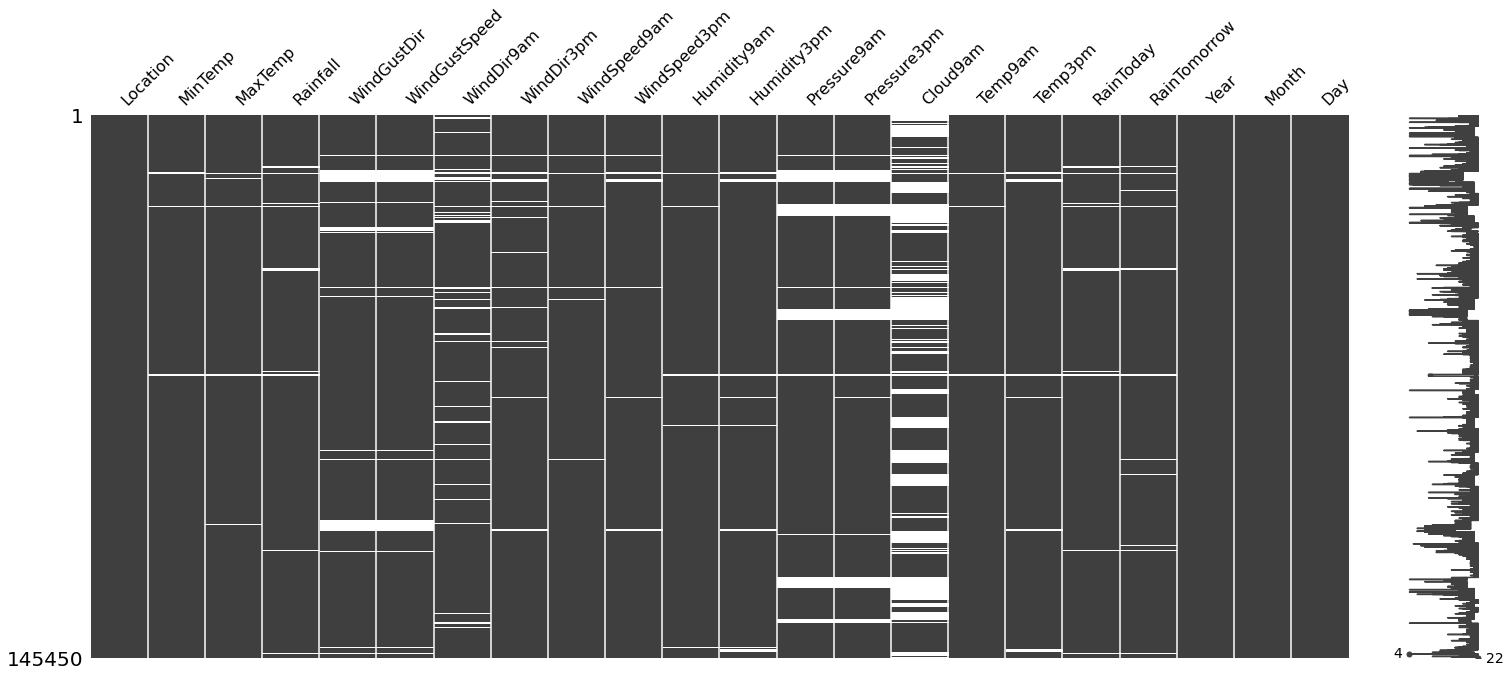

In [35]:
#Visualisasikan Missing value
msno.matrix(df_new)

In [36]:
# percentage of missing values in each variable of new data

df_new.isnull().sum()/len(df_new)*100

Location          0.000000
MinTemp           1.020969
MaxTemp           0.866965
Rainfall          2.242008
WindGustDir       7.099347
WindGustSpeed     7.056033
WindDir9am        7.262977
WindDir3pm        2.906841
WindSpeed9am      1.214850
WindSpeed3pm      2.105191
Humidity9am       1.824682
Humidity3pm       3.098659
Pressure9am      10.357511
Pressure3pm      10.332073
Cloud9am         38.421451
Temp9am           1.214850
Temp3pm           2.481265
RainToday         2.242008
RainTomorrow      2.246133
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

> Asumsi saya missing value yang terjadi adalah Missing Completely At Random (MCAR) dimana nilainya akan di handling dengan 
- Mean Imputation (numeric variable with Gaussian/Normal Distribution),
- Median Imputation (numeric variable with skewed distribution)
- Mode Imputation (categorical variable)


In [37]:
# shape of new and original data

df_new.shape, df.shape

((145450, 22), (145460, 25))

> setelah menghapus data yang tidak diperlukan, kita bisa lihat shapenya berubah dari 23 kolom menjadi 20 kolom.
> agar tidak terjadi data leakage maka inputer mising value akan di lakukan setelah split dataset

### Deklarasi X,y sebagai target prediksi kita


In [38]:
X = df_new.drop(['RainTomorrow'], axis=1)

y = df_new[['RainTomorrow']]

In [39]:
X.shape

(145450, 21)

In [40]:
y.shape

(145450, 1)

>Shape yang di pecah antara X dan Y memiliki shape yang sama

---
### Menyiapkan data inference

In [41]:
X_inf= df_inf.drop(['RainTomorrow'], axis=1)
Y_inf= df_inf[['RainTomorrow']]


---
### Memecah data training dan testing

In [42]:
# data train 80% data test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape 


((116360, 21), (116360, 1), (29090, 21), (29090, 1))

--- 
### Melihat Distribusi data

In [43]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        print(dist_check.index[i], ': Negatively skewed distribution')
    elif dist_check.values[i] > 0.5:
        print(dist_check.index[i], ': Positively skewed distribution')
    else:
        print(dist_check.index[i], ': Normally distributed')
        

MinTemp : Normally distributed
MaxTemp : Normally distributed
Rainfall : Positively skewed distribution
WindGustSpeed : Positively skewed distribution
WindSpeed9am : Positively skewed distribution
WindSpeed3pm : Positively skewed distribution
Humidity9am : Normally distributed
Humidity3pm : Normally distributed
Pressure9am : Normally distributed
Pressure3pm : Normally distributed
Cloud9am : Normally distributed
Temp9am : Normally distributed
Temp3pm : Normally distributed
RainToday : Positively skewed distribution
Year : Normally distributed
Month : Normally distributed
Day : Normally distributed


>Bisa kita simpulkan distribusi data nya 
1. Normal Distribution -> missing value di handling dengan mean imputation
    - MinTemp : Normally distributed
    - MaxTemp : Normally distributed
    - Humidity9am : Normally distributed
    - Humidity3pm : Normally distributed
    - Pressure9am : Normally distributed
    - Pressure3pm : Normally distributed
    - Year : Normally distributed
    - Month : Normally distributed
    - Day : Normally distributed
2. Skewed Distribution -> missing value di handling dengan median imputation
    - Rainfall : Positively skewed distribution
    - WindGustSpeed : Positively skewed distribution
    - WindSpeed9am : Positively skewed distribution
    - WindSpeed3pm : Positively skewed distribution
    - Cloud9am : Negatively skewed distribution
    - Temp9am : Normally distributed
    - Temp3pm : Normally distributed
    - RainToday : Positively skewed distribution
3. Data object -> missing value akan di handling dengan most frequent imputation
    - 'WindGustDir'
    - 'WindDir9am'
    - 'RainToday'

### Feature Engginering
> kita akan melakukan handling missing value dengan menggunakan metode imputing.
> handling outlier dengan menggunakan metode outlier removal.

***Asumsi***
> missing value yang terjadi adalah MCAR jadi ada 2 metode yang bisa digunakan untuk menghandle missing value, yaitu dengan menggunakan metode input secara random atau menggunakan Mean / median
> imputasi yang akan di lakukan adalah median karena robust dengan outlier

In [44]:
# Membuat variabel yang mengandung tipe distribusi
normal_dist = ['MinTemp', 'MaxTemp',  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Year', 'Month', 'Day']
skewed_dist = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am','Rainfall','Temp9am', 'Temp3pm']
other_dist = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']

---
### Inputasi Missing Value
> acuan pengisian missing value adalah mode,mean dan median yang berasal dari train data hal ini di lakukan agar tidak terjadi *kebocoran data*

In [45]:

for i in other_dist:
    X_train[i].fillna(X_train[i].mode().item(), inplace=True)
    X_test[i].fillna(X_train[i].mode().item(), inplace=True)
    X_inf[i].fillna(X_train[i].mode().item(), inplace=True)
for j in normal_dist:
    X_train[j].fillna(X_train[j].mean(), inplace=True)
    X_test[j].fillna(X_train[j].mean(), inplace=True)
    X_inf[j].fillna(X_train[j].mean(), inplace=True)
for k in skewed_dist:
    X_train[k].fillna(X_train[k].median(), inplace=True)
    X_test[k].fillna(X_train[k].median(), inplace=True)
    X_inf[k].fillna(X_train[k].median(), inplace=True)

In [46]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [47]:
# Handling Missing Value pada data target menggunakan metode most frequent
y_train['RainTomorrow'].fillna(y_train['RainTomorrow'].mode().item(), inplace=True)
y_test['RainTomorrow'].fillna(y_test['RainTomorrow'].mode().item(), inplace=True)

In [48]:
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

<AxesSubplot:>

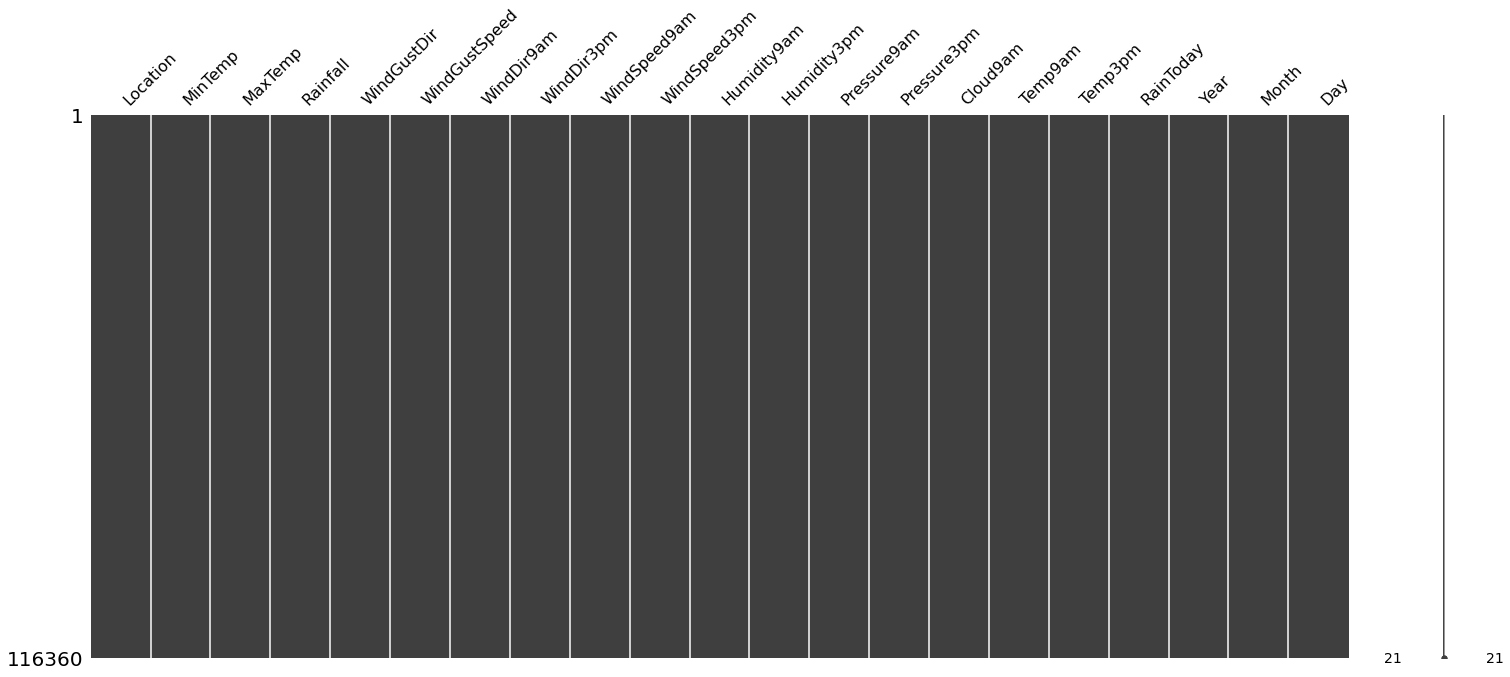

In [49]:
#Visualisasikan Missing value
msno.matrix(X_train)

<AxesSubplot:>

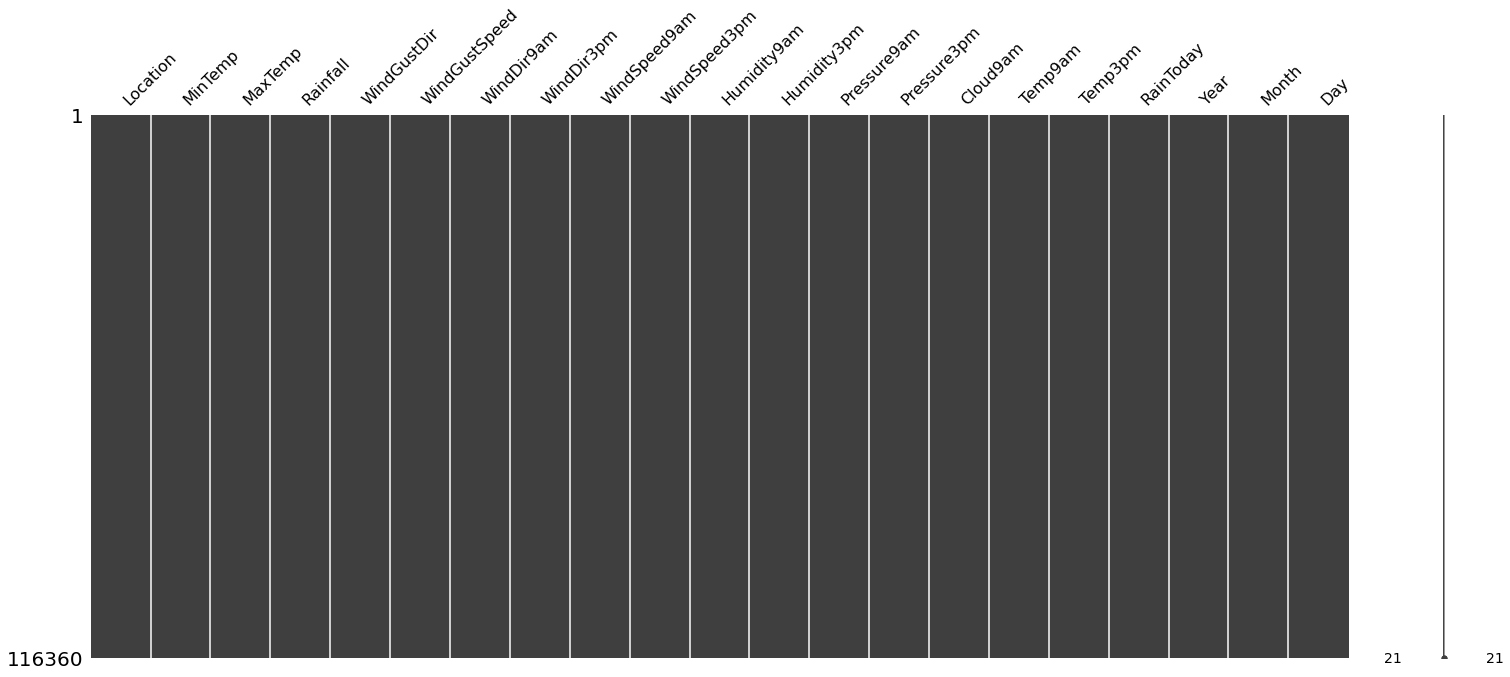

In [50]:
msno.matrix(X_train)

In [51]:
# percentage of missing values in each variable of new data

X_test.isnull().sum()/len(X_test)*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64

---
### Handling Outliers
- jika data berdistribusi normal maka akan di handling dengan ***z-score***
- jika data berdistribusi skewed maka akan di handling dengan ***IQR***


In [52]:
# Input Paramater Distribution  Check after handling missval
dist_check = X_train.skew(numeric_only=True)

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        print(dist_check.index[i], ': Negatively skewed distribution')
    elif dist_check.values[i] > 0.5:
        print(dist_check.index[i], ': Positively skewed distribution')
    else:
        print(dist_check.index[i], ': Normally distributed')

MinTemp : Normally distributed
MaxTemp : Normally distributed
Rainfall : Positively skewed distribution
WindGustSpeed : Positively skewed distribution
WindSpeed9am : Positively skewed distribution
WindSpeed3pm : Positively skewed distribution
Humidity9am : Normally distributed
Humidity3pm : Normally distributed
Pressure9am : Normally distributed
Pressure3pm : Normally distributed
Cloud9am : Negatively skewed distribution
Temp9am : Normally distributed
Temp3pm : Normally distributed
RainToday : Positively skewed distribution
Year : Normally distributed
Month : Normally distributed
Day : Normally distributed


In [53]:
# Outliers Detection Function
# for Normally Distributed Data

def detect1(df, parameter):

    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    result = df[
        abs((df[parameter]-mean_)/std_) > threshold
    ]
    return result
# Outliers Detection Function
# for Skew Distributed Data

def detect2(df, parameter):

    IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
    upper = df[parameter].quantile(0.75) + (1.5*IQR)
    bottom = df[parameter].quantile(0.25) - (1.5*IQR)

    result = df[
        (df[parameter] > upper) |
        (df[parameter] < bottom)
    ]
    return result
    
    

In [54]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    print(variable)
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))
    sns.histplot(X_train[variable], bins=30, ax=ax[0])
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(45)
    ax[0].set_title(f'Histogram')

    # Boxplot
    try: 
        sns.boxplot(y=X_train[variable], ax=ax[1])
        ax[1].set_title('Boxplot')
    except Exception as e:
        # sns.scatterplot(X_train[variable], X_train['price'], ax=ax[1])
        # ax[1].set_title('Boxplot')
        print(' Variabel ini tidak bisa di berikan Boxplot')
    plt.show();

for col in X_train.columns:
    if 'date' not in col.lower():
        diagnostic_plots(X_train,col)

> dari data yang di dapatkan bisa kita simpulkan data yang memiliki outliers adalah
- 'MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am',',WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm'

In [56]:
normal_dist_out = ['MinTemp', 'MaxTemp', 'Humidity9am','Pressure9am', 'Pressure3pm']
skewed_dist_out = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Temp9am', 'Temp3pm']


In [57]:
# loop menampilkan outlier distribusi normal
for l in normal_dist_out:
    n = detect1(X_train, l)
    print(l)
    print('Outliers count :', len(n))
    print('Total entries :', len(X_train[l]))
    print('Outliers percentage :', len(n)/len(X_train[l])*100)
    print()

MinTemp
Outliers count : 25
Total entries : 116360
Outliers percentage : 0.02148504640770024

MaxTemp
Outliers count : 274
Total entries : 116360
Outliers percentage : 0.23547610862839466

Humidity9am
Outliers count : 454
Total entries : 116360
Outliers percentage : 0.3901684427638364

Pressure9am
Outliers count : 605
Total entries : 116360
Outliers percentage : 0.5199381230663458

Pressure3pm
Outliers count : 534
Total entries : 116360
Outliers percentage : 0.4589205912684771



In [58]:
#loop menampilkan outlier distribusi skew
for m in skewed_dist_out:
    o = detect2(X_train, m)
    print(m)
    print('Outliers count :', len(o))
    print('Total entries :', len(X_train[m]))
    print('Outliers percentage :', len(o)/len(X_train[m])*100)
    print()


WindGustSpeed
Outliers count : 4395
Total entries : 116360
Outliers percentage : 3.777071158473702

WindSpeed9am
Outliers count : 1436
Total entries : 116360
Outliers percentage : 1.2341010656583018

WindSpeed3pm
Outliers count : 2015
Total entries : 116360
Outliers percentage : 1.7316947404606393

Temp9am
Outliers count : 241
Total entries : 116360
Outliers percentage : 0.2071158473702303

Temp3pm
Outliers count : 774
Total entries : 116360
Outliers percentage : 0.6651770367823995



>Asumsi saya untuk outlier
- "<5%: trim \remove"
- "5-15% : capping"
- ">15% di biarkan"


In [59]:
#handling outlier base on case
outlier_remove= ['Temp9am','Pressure3pm','Humidity9am','MaxTemp','MinTemp']
outlier_capping= ['Temp3pm','Pressure9am']

In [60]:
X_train[outlier_capping].describe()

,Temp3pm,Pressure9am
count,116360.000000,116360.000000
mean,21.666985,1017.660046
std,6.853712,6.728249
min,-5.400000,980.500000
25%,16.700000,1013.600000
50%,21.100000,1017.660046
75%,26.200000,1021.800000
max,46.700000,1041.000000


---
### Handling Outlier menggunakan Capping

In [61]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Temp3pm'] = max_value(df3, 'Temp3pm', 46.7)
    df3['Pressure9am'] = max_value(df3, 'Pressure9am', 1041)

In [62]:
X_train.Temp3pm.max(), X_test.Temp3pm.max()

(46.7, 46.2)

In [63]:
X_train.Pressure9am.max(), X_test.Pressure9am.max()

(1041.0, 1040.6)

Temp9am


<Figure size 1152x288 with 0 Axes>

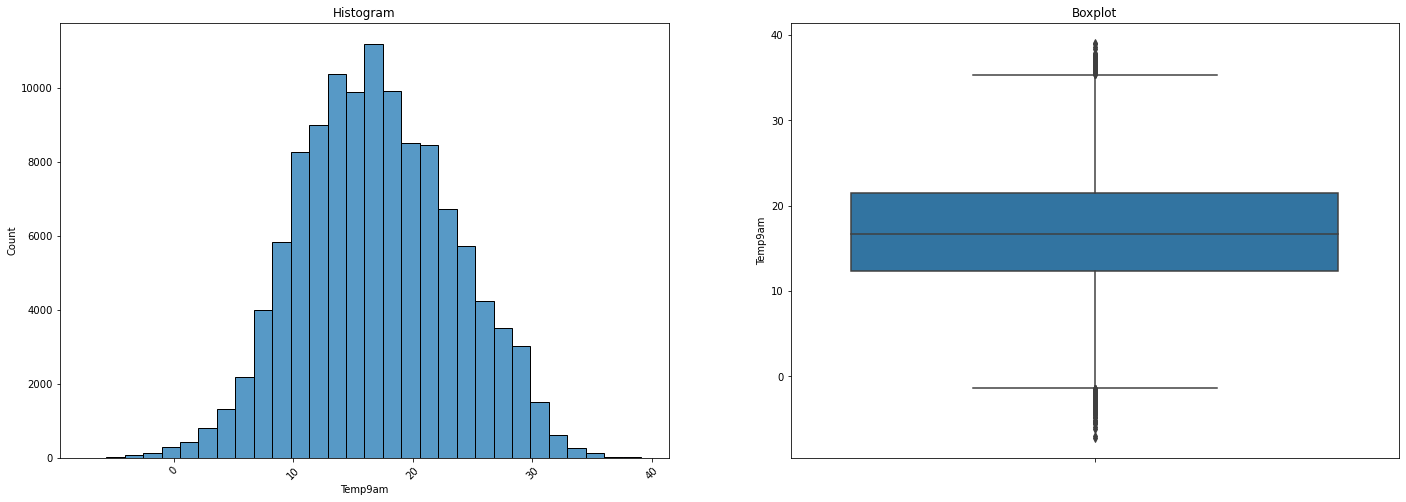

Pressure3pm


<Figure size 1152x288 with 0 Axes>

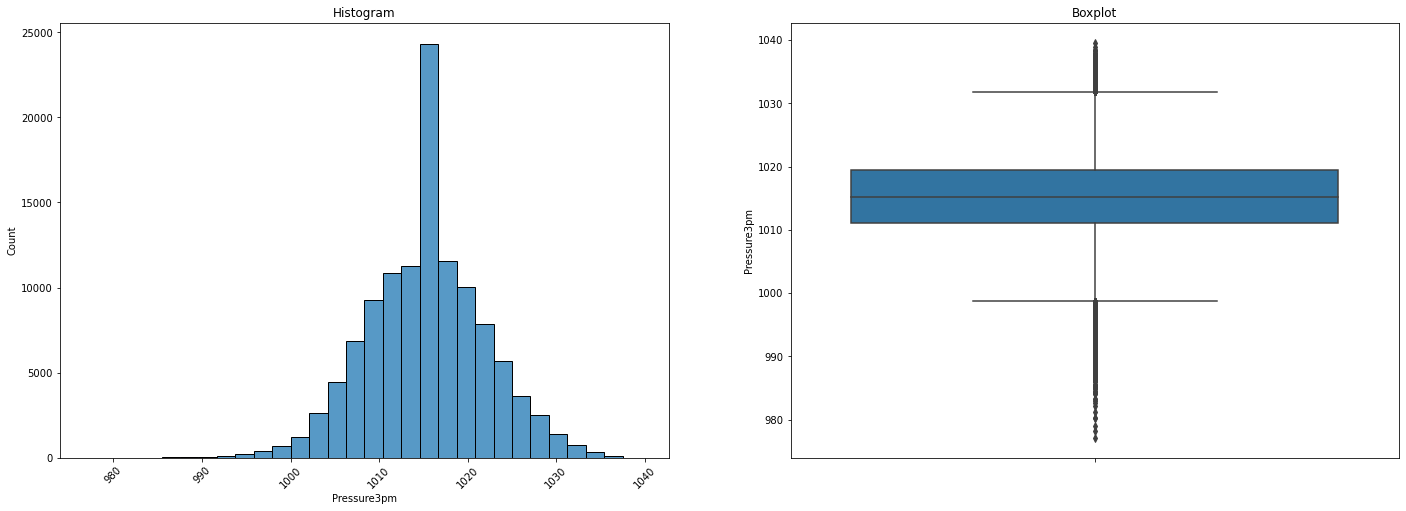

Humidity9am


<Figure size 1152x288 with 0 Axes>

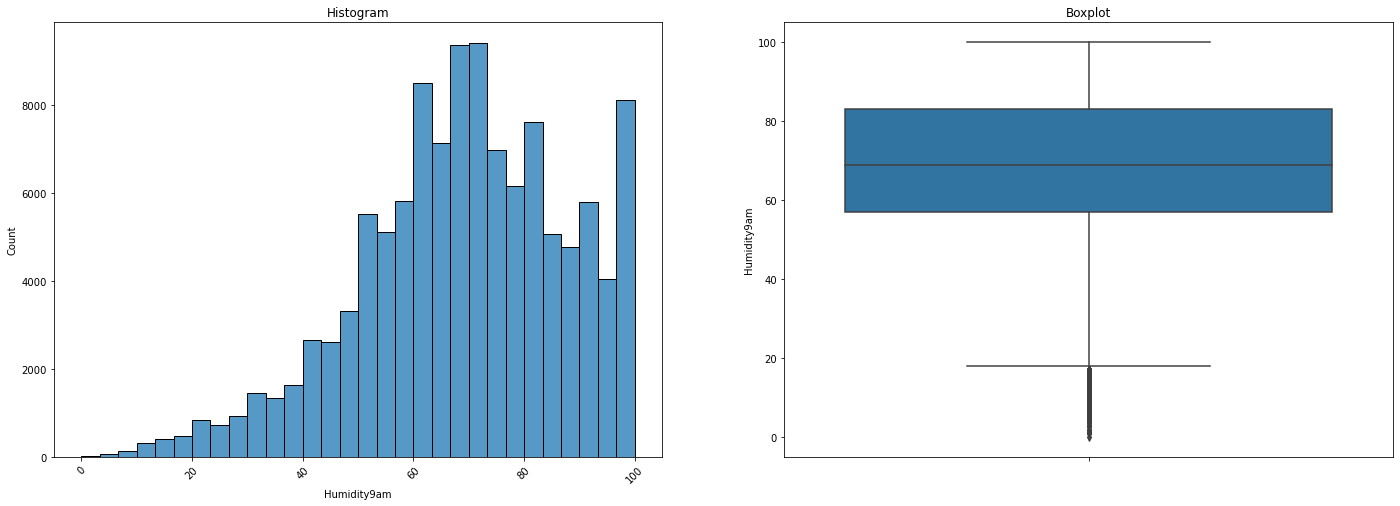

MaxTemp


<Figure size 1152x288 with 0 Axes>

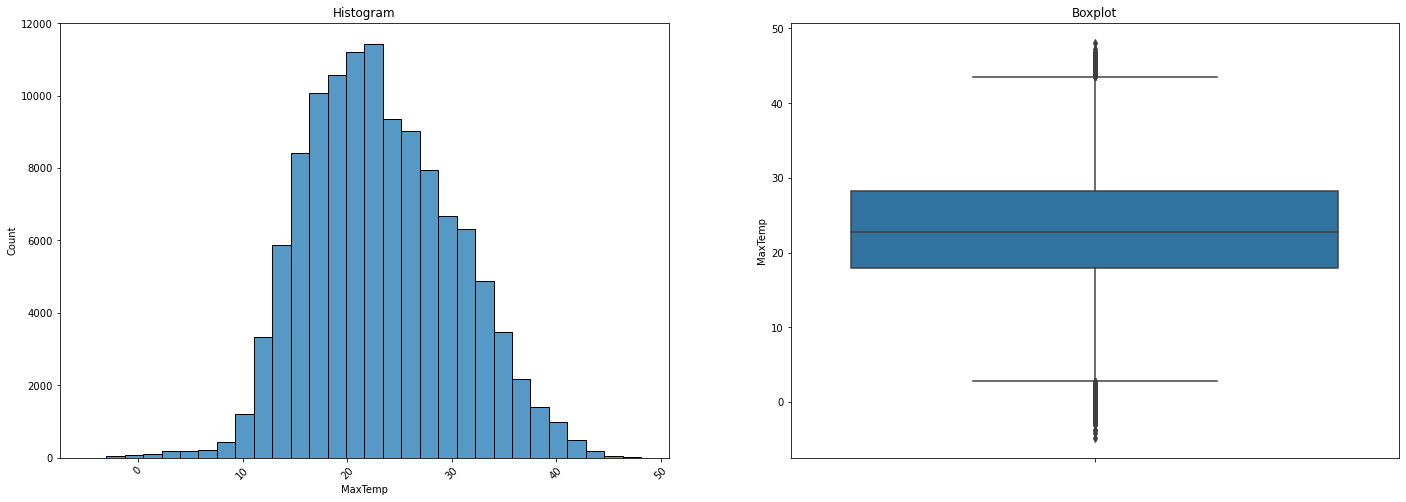

MinTemp


<Figure size 1152x288 with 0 Axes>

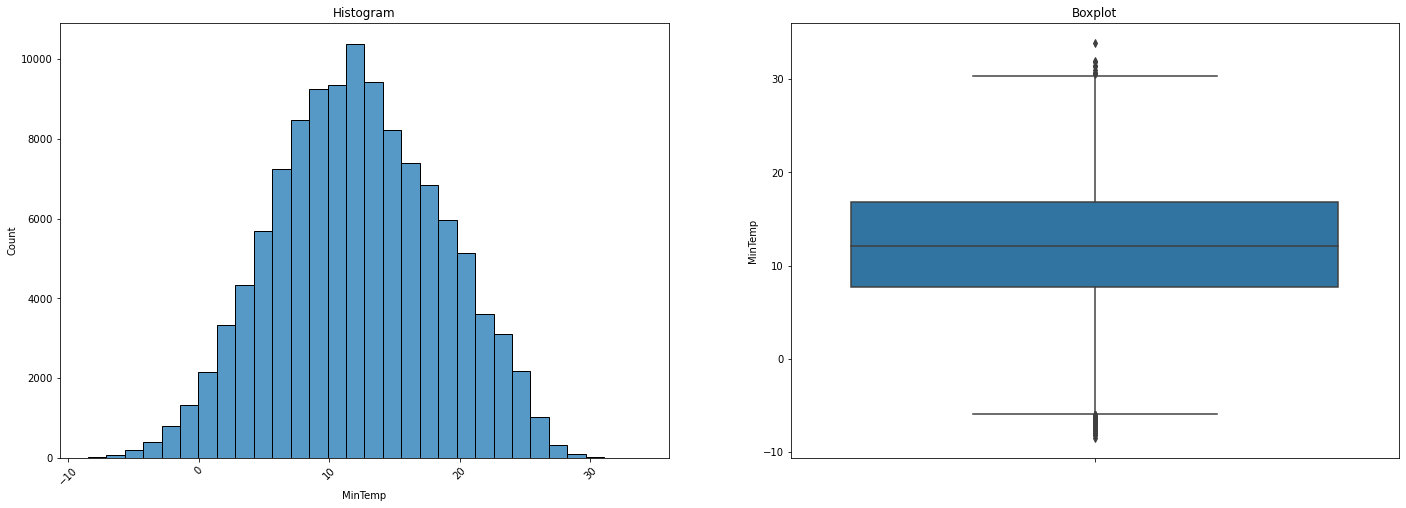

In [64]:
for i in outlier_remove:
    diagnostic_plots(X_train,i)

---
Handling outlier menggunakan Trimiing
> yang harus di perhatikan saat melakukan triming data inference juga harus disesuaikan shapenya

In [65]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [66]:
# Limits for `Temp9am`
Temp9am_upper_limit, Temp9am_lower_limit = find_skewed_boundaries(X_train, 'Temp9am', 1.5)

# Limits for `Pressure3pm`
Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_train, 'Pressure3pm', 1.5)

# Limits for `Humidity9am`
Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_train, 'Humidity9am', 1.5)

# Limits for `MaxTemp`
MaxTemp_upper_limit, MaxTemp_lower_limit = find_skewed_boundaries(X_train, 'MaxTemp', 1.5)

# Limits for `MinTemp`
MinTemp_upper_limit, MinTemp_lower_limit = find_skewed_boundaries(X_train, 'MinTemp', 1.5)


In [67]:
print('Temp9am_upper_limit:' , Temp9am_upper_limit)
print('Temp9am_lower_limit:' , Temp9am_lower_limit, '\n')

print('Pressure3pm_upper_limit:' , Pressure3pm_upper_limit)
print('Pressure3pm_lower_limit:' , Pressure3pm_lower_limit, '\n')

print('Humidity9am_upper_limit:' , Humidity9am_upper_limit)
print('Humidity9am_lower_limit:' , Humidity9am_lower_limit, '\n')

print('MaxTemp_upper_limit:' , MaxTemp_upper_limit)
print('MaxTemp_lower_limit:' , MaxTemp_lower_limit, '\n')

print('MinTemp_upper_limit:' , MinTemp_upper_limit)
print('MinTemp_lower_limit:' , MinTemp_lower_limit, '\n')

Temp9am_upper_limit: 35.3
Temp9am_lower_limit: -1.4999999999999982 

Pressure3pm_upper_limit: 1031.85
Pressure3pm_lower_limit: 998.6500000000001 

Humidity9am_upper_limit: 122.0
Humidity9am_lower_limit: 18.0 

MaxTemp_upper_limit: 43.5
MaxTemp_lower_limit: 2.700000000000001 

MinTemp_upper_limit: 30.450000000000003
MinTemp_lower_limit: -5.950000000000002 



In [68]:
# Flag the outliers in category `Temp9am`
outliers_Temp9am = np.where(X_train['Temp9am'] > Temp9am_upper_limit, True,
                       np.where(X_train['Temp9am'] < Temp9am_lower_limit, True, False))

# Flag the outliers in category `Pressure3pm`
outliers_Pressure3pm = np.where(X_train['Pressure3pm'] > Pressure3pm_upper_limit, True,
                          np.where(X_train['Pressure3pm'] < Pressure3pm_lower_limit, True, False))

# Flag the outliers in category `Humidity9am`
outliers_Humidity9am = np.where(X_train['Humidity9am'] > Humidity9am_upper_limit, True,
                            np.where(X_train['Humidity9am'] < Humidity9am_lower_limit, True, False))

# Flag the outliers in category `MaxTemp`
outliers_MaxTemp = np.where(X_train['MaxTemp'] > MaxTemp_upper_limit, True,
                        np.where(X_train['MaxTemp'] < MaxTemp_lower_limit, True, False))

# Flag the outliers in category `MinTemp`
outliers_MinTemp = np.where(X_train['MinTemp'] > MinTemp_upper_limit, True,
                        np.where(X_train['MinTemp'] < MinTemp_lower_limit, True, False))

print(outliers_Temp9am[:10])

[False False False False False False False False False False]


In [69]:
# Trim dataset
X_train_trimmed = X_train.loc[~(outliers_Temp9am + outliers_Pressure3pm + outliers_Humidity9am + outliers_MaxTemp + outliers_MinTemp)]
y_train_trimmed = y_train.loc[~(outliers_Temp9am + outliers_Pressure3pm + outliers_Humidity9am + outliers_MaxTemp + outliers_MinTemp)]

print( 'Size Dataset before trimming outliers: ', X_train.shape)
print( 'Size Dataset before trimming outliers: ', y_train.shape,'\n')

print( 'Size Dataset after trimming outliers: ', X_train_trimmed.shape)
print( 'Size Dataset after trimming outliers: ', y_train_trimmed.shape)

Size Dataset before trimming outliers:  (116360, 21)
Size Dataset before trimming outliers:  (116360, 1) 

Size Dataset after trimming outliers:  (112749, 21)
Size Dataset after trimming outliers:  (112749, 1)


In [70]:
y_train = y_train_trimmed
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112749 entries, 1646 to 43567
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   RainTomorrow  112749 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [71]:
X_train = X_train_trimmed
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112749 entries, 1646 to 43567
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112749 non-null  object 
 1   MinTemp        112749 non-null  float64
 2   MaxTemp        112749 non-null  float64
 3   Rainfall       112749 non-null  float64
 4   WindGustDir    112749 non-null  object 
 5   WindGustSpeed  112749 non-null  float64
 6   WindDir9am     112749 non-null  object 
 7   WindDir3pm     112749 non-null  object 
 8   WindSpeed9am   112749 non-null  float64
 9   WindSpeed3pm   112749 non-null  float64
 10  Humidity9am    112749 non-null  float64
 11  Humidity3pm    112749 non-null  float64
 12  Pressure9am    112749 non-null  float64
 13  Pressure3pm    112749 non-null  float64
 14  Cloud9am       112749 non-null  float64
 15  Temp9am        112749 non-null  float64
 16  Temp3pm        112749 non-null  float64
 17  RainToday      112749 non-n

In [72]:
# find categorical variables

num_cols = [col for col in df_new.columns if df_new[col].dtypes != 'O']
cat_cols = [col for col in df_new.columns if df_new[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day']
Categorical Columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [73]:
Numerical_Columns= ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday',  'Year', 'Month', 'Day']
Categorical_Columns= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [74]:
# Splitting Dataset based on input type

X_train_num = X_train[Numerical_Columns]
X_train_cat = X_train[Categorical_Columns]
X_inf_num = X_inf[Numerical_Columns]
X_inf_cat = X_inf[Categorical_Columns]
X_test_num = X_test[Numerical_Columns]
X_test_cat = X_test[Categorical_Columns]

---
### Feature Scaling

In [75]:
# Define the scaling method
scaler = StandardScaler()

# Train the data into scaler
# Use only data from `Train Set` for training
scaler.fit(X_train_num)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_inf_num_scaled = scaler.transform(X_inf_num)


---
### Feature Encoding

In [76]:
# Define the encoding method
encoder = OneHotEncoder()

# Train the data into scaler
# Use only data from `Train Set` for training
encoder.fit(X_train_cat)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_inf_cat_encoded = encoder.transform(X_inf_cat).toarray()

---
### Satukan kembali Dataset

In [77]:
# Concatenate

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_cat_encoded], axis=1)


In [78]:
np.count_nonzero(~np.isnan(X_train_num_scaled))

1916733

In [79]:
# Check
# Turn it into dataframe first

df_X_train_final = pd.DataFrame(X_train_final)
df_X_train_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
47167,-0.307863,0.112967,-0.276160,0.100950,0.917735,0.160923,0.151272,-0.536709,-0.609420,-0.654263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24347,0.758051,0.551283,-0.276160,-0.759073,-0.106641,0.045180,-0.021882,-0.009707,-0.012625,-0.015222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52120,1.983057,1.544799,-0.276160,0.804605,0.348637,0.045180,0.373166,-0.436993,-0.958605,-1.186415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34635,0.710324,0.186019,-0.227743,-1.384544,-1.131017,-0.880763,0.650534,0.310880,-1.022093,-1.170289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5485,0.630778,0.375956,-0.276160,1.820996,1.828291,0.623894,-1.623880,-0.786000,-1.720461,-2.105586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100189,-0.801047,-0.486065,-0.276160,-1.228176,-1.131017,-1.459478,-0.070622,-0.387135,-0.006284,-0.315621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107593,0.821688,0.945767,-0.276160,-0.759073,-0.561919,-0.649278,-0.403463,-0.187702,-0.784012,-0.896150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77225,0.869415,0.215240,-0.276160,-0.055418,-1.586295,-0.417792,0.706007,0.510312,-1.355405,-1.299295,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42844,0.789869,0.609725,-0.276160,-0.368153,-0.334280,0.392408,0.206745,0.061589,0.406389,0.361663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72663,-0.705592,-0.968213,-0.276160,-1.071809,-1.586295,-0.186306,-0.347990,0.011731,2.326903,2.312887,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Model Definition

Dataset yang diprediksi adalah klasifikasi, maka model yang digunakan adalah model Logistic Regression dan LinearSVC.

In [80]:
#Model Definition
model1 = LogisticRegression(C=100, penalty='l2', solver='sag', max_iter=1000)
model2 = LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=1000)
# model3 = SVC(C=1.0, kernel='rbf', gamma=0.1, probability=True, cache_size=2000)

> Hyper parameter di definisikan



- Logistic Regression
    - C : Penalty parameter C of the error term. = 100
    - penalty : Type of regularization to use (‘l1’ or ‘l2’). = L2
    - solver : Algorithm to use in the optimization problem. = saga
    - max_iter : Maximum number of iterations to perform. = 1000


- LinearSVC
    - C : Penalty parameter C of the error term. =1.0
    - penalty : Type of regularization to use (‘l1’ or ‘l2’). = L1
    - dual : Select the algorithm to either solve the dual or primal optimization problem. = False
    - max_iter : Maximum number of iterations to perform. = 1000


# 7. Model Training

## Logistic Regression Model

In [81]:
# Model Training LogReg
model1.fit(X_train_final, y_train)

LogisticRegression(C=100, max_iter=1000, solver='sag')

In [82]:
# Determines prediction result Logreg
y_pred_train = model1.predict(X_train_final)
y_pred_test = model1.predict(X_test_final)

y_pred_test

array([0., 1., 0., ..., 1., 0., 0.])

## SVM Model - LinearSVC

In [83]:
# Model Training LinearSVC
model2.fit(X_train_final, y_train)

LinearSVC(dual=False, penalty='l1')

In [84]:
# Determines prediction result Logreg
y_pred_train = model2.predict(X_train_final)
y_pred_test = model2.predict(X_test_final)

y_pred_test

array([0., 1., 0., ..., 1., 0., 0.])

## SVM Model - SVC - Waktunya terlalu lama jadi saya memutuskan untuk interupt (sudah berjalan 3jam lebih)

In [85]:
# # Model Training SVC
# model3.fit(X_train_final, y_train)

In [86]:
# # Determines prediction result SVC
# y_pred_train = model3.predict(X_train_final)
# y_pred_test = model3.predict(X_test_final)

# y_pred_test

# 8.Model Evaluation

Evaluasi terbaik dari masing-masing model

In [87]:
print('Training set score Logistic Regression: ' + str(model1.score(X_train_final, y_train)))
print('Test set score Logistic Regression: ' + str(model1.score(X_test_final, y_test)))

print('\nTraining set score SVC: ' + str(model2.score(X_train_final, y_train)))
print('Test set score SVC: ' + str(model2.score(X_test_final, y_test)))

Training set score Logistic Regression: 0.8460740228294708
Test set score Logistic Regression: 0.8484358886215194

Training set score SVC: 0.845905506922456
Test set score SVC: 0.8484015125472671


In [88]:
print('Logistic Regression\n',classification_report(y_test, model1.predict(X_test_final)))

Logistic Regression
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22828
         1.0       0.72      0.49      0.58      6262

    accuracy                           0.85     29090
   macro avg       0.79      0.72      0.74     29090
weighted avg       0.84      0.85      0.84     29090



>Pada Model Logistic Regresion model mempunyai F1 score dengan nilai 91% untuk memprediksi besok tidak hujan, sedangkan untuk prediksi besok hujan maka nilai F1 scorenya adalah 58%

In [89]:
print('\nLinear SVC\n', classification_report(y_test, model2.predict(X_test_final)))


Linear SVC
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22828
         1.0       0.73      0.47      0.57      6262

    accuracy                           0.85     29090
   macro avg       0.80      0.71      0.74     29090
weighted avg       0.84      0.85      0.84     29090



>Pada Model SVC model mempunyai F1 score dengan nilai 91% untuk memprediksi besok tidak hujan, sedangkan untuk prediksi besok hujan maka nilai F1 scorenya adalah 57%

1 = di prediksikan hujan
0 = di prediksikan tidak hujan

In [90]:
#Komparasi Model pada TEST set
logreg = model1.score(X_test_final, y_test)
svc = model2.score(X_test_final, y_test)
print('Skor Dengan Model Logistic Regression ',round(logreg,2))
print('Skor Dengan Model LinearSVC ',round(svc,2))

Skor Dengan Model Logistic Regression  0.85
Skor Dengan Model LinearSVC  0.85


> Skor model sama untuk semua model

In [91]:
#melihat confusion matrix untuk model logistic regression
log_confusion = confusion_matrix(y_test, model1.predict(X_test_final))
log_confusion

array([[21613,  1215],
       [ 3194,  3068]], dtype=int64)

> Model Logistic Regression memprediksi 21613 + 1215 data yang benar, dan 3194 + 3068 data yang salah. 

In [92]:
#melihat confusion matrix untuk model LinearSVM
log_confusion = confusion_matrix(y_test, model2.predict(X_test_final))
log_confusion

array([[21741,  1087],
       [ 3323,  2939]], dtype=int64)

> Model LinearSVC memprediksi 21740 + 1088 data yang benar, dan 3323 + 2939 data yang salah. 

---
Nilai ROC AUC Score untuk LinearSVC Test

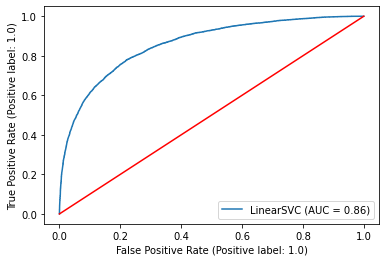

In [93]:
plot_roc_curve(model2, X_test_final, y_test)
plt.plot([0,1], [0,1], c='r')

> Score ROC AUC Score untuk LinearSVC Test adalah 86%

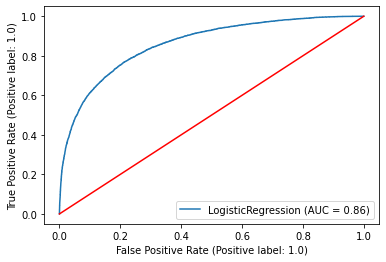

In [94]:
plot_roc_curve(model1, X_test_final, y_test)
plt.plot([0,1], [0,1], c='r')

> Score ROC AUC Score untuk LogisticRegression Test adalah 86%

# 9. Model Inference
Menguji model menggunakan data inference (df_inf)

In [95]:
#prediksi data inference dengan LogisticRegression
inf_pred_log = model1.predict(X_inf_final)
inf_pred_df_log = pd.DataFrame(inf_pred_log, columns=['prediksi_hujan_besok_log'])
inf_pred_df_log

,prediksi_hujan_besok_log
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [96]:
#prediksi data inference dengan model LinearSVC
inf_pred_svc = model2.predict(X_inf_final)
inf_pred_df_svc = pd.DataFrame(inf_pred_svc, columns=['prediksi_hujan_besok_svc'])
inf_pred_df_svc

,prediksi_hujan_besok_svc
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [97]:
df_inf_pred = pd.concat([inf_pred_df_log ,inf_pred_df_svc ], axis=1)

In [98]:
result= pd.concat([df_inf, df_inf_pred], axis=1)
result

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,prediksi_hujan_besok_log,prediksi_hujan_besok_svc
0,Perth,5.9,15.8,13.8,SSW,61.0,S,SW,13.0,15.0,...,7.0,11.6,14.3,1.0,0.0,2016,9,19,1.0,1.0
1,GoldCoast,22.1,30.3,0.0,ENE,20.0,ENE,E,11.0,15.0,...,NaN,26.2,27.5,0.0,0.0,2009,12,14,0.0,0.0
2,Townsville,26.8,33.6,3.4,SSW,43.0,NaN,ENE,0.0,19.0,...,7.0,29.4,30.8,1.0,1.0,2016,2,5,1.0,1.0
3,Melbourne,9.6,20.0,0.2,N,43.0,N,WNW,19.0,9.0,...,1.0,14.2,15.1,0.0,1.0,2017,5,6,0.0,0.0
4,Launceston,8.8,24.4,0.0,NW,30.0,ENE,NW,6.0,17.0,...,NaN,14.0,23.9,0.0,0.0,2011,2,23,0.0,0.0
5,Richmond,-0.2,16.9,0.0,SSE,31.0,NaN,SSE,0.0,24.0,...,NaN,7.6,15.2,0.0,0.0,2012,8,1,0.0,0.0
6,Ballarat,9.9,20.6,0.0,SSE,57.0,SE,SE,30.0,39.0,...,3.0,14.0,19.6,0.0,0.0,2013,3,1,0.0,0.0
7,PerthAirport,9.3,26.8,0.0,SE,44.0,NE,S,11.0,13.0,...,1.0,19.1,26.4,0.0,0.0,2017,4,28,0.0,0.0
8,CoffsHarbour,6.5,19.3,0.0,SW,57.0,NW,WSW,9.0,31.0,...,3.0,16.5,18.1,0.0,0.0,2009,7,3,0.0,0.0
9,NorahHead,8.8,18.6,15.2,SSW,41.0,WSW,ESE,11.0,7.0,...,NaN,11.5,16.7,1.0,0.0,2016,8,27,0.0,0.0


In [99]:
result.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,prediksi_hujan_besok_log,prediksi_hujan_besok_svc
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000,10.000000,6.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,10.750000,22.630000,3.260000,42.70000,11.000000,18.900000,67.300000,51.800000,1018.290,1015.850000,3.666667,16.410000,20.76000,0.300000,0.200000,2013.600000,6.000000,12.700000,0.200000,0.200000
std,7.885747,5.939893,6.025907,13.17447,8.819171,9.915756,14.345344,19.943253,7.365,7.622518,2.732520,6.775684,5.93936,0.483046,0.421637,3.204164,3.333333,10.842816,0.421637,0.421637
min,-0.200000,15.800000,0.000000,20.00000,0.000000,7.000000,40.000000,21.000000,1004.100,1000.600000,1.000000,7.600000,14.30000,0.000000,0.000000,2009.000000,2.000000,1.000000,0.000000,0.000000
25%,7.075000,18.775000,0.000000,33.50000,6.750000,13.500000,64.250000,40.500000,1017.150,1016.150000,1.500000,12.200000,15.57500,0.000000,0.000000,2011.250000,3.250000,3.500000,0.000000,0.000000
50%,9.050000,20.300000,0.000000,43.00000,11.000000,16.000000,71.000000,53.500000,1020.450,1018.900000,3.000000,14.100000,18.85000,0.000000,0.000000,2014.500000,6.000000,10.000000,0.000000,0.000000
75%,9.825000,26.200000,2.600000,53.75000,12.500000,22.750000,76.000000,67.500000,1023.300,1020.275000,6.000000,18.450000,25.77500,0.750000,0.000000,2016.000000,8.000000,22.000000,0.000000,0.000000
max,26.800000,33.600000,15.200000,61.00000,30.000000,39.000000,84.000000,76.000000,1026.300,1022.800000,7.000000,29.400000,30.80000,1.000000,1.000000,2017.000000,12.000000,28.000000,1.000000,1.000000


# 10. Kesimpulan

## Overall Data
- data yang di miliki inbalance atau tidak sama porsinya terlalu banyak porsi data `tidak hujan`
- data yang di miliki mempunyai banyak sekali missing value
- handling outlier digunakan metode capping dan trimming pada dataset kita
- feature yang di gunakan untuk memprediksi raintomorrow adalah MinTemp,	MaxTemp,	Rainfall,	WindGustSpeed,	WindSpeed9am,	WindSpeed3pm,	Humidity9am,	Humidity3pm,	Pressure9am,	Pressure3pm,	Cloud9am,	Temp9am,	Temp3pm,	RainToday,	RainTomorrow,	Year,Month dan	Day

## Model

### Logistic Regression
> Hyper Parameter yang di gunakan adalah
>    - C = 100
>   - penalty = L2
>  - solver = saga
> - max_iter = 1000

> Score
>    - Training set score Logistic Regression: 0.8460740228294708
>   - Test set score Logistic Regression: 0.8484358886215194

### SVM
> Hyper Parameter yang di gunakan adalah
>    - C = 1.0
>   - penalty = L1
>  - dual = False
> - max_iter = 1000

> Score        
>    - Training set score SVC: 0.845905506922456
>   - Test set score SVC: 0.8483671364730148


## Model terbaik
> saya menyimpulkan *model yang terbaik adalah model Logistic Regression* 